# Übung 4.1: Buchstabenrätsel

Die Idee dieser Aufgabe ist einer Übungsaufgabe von Herr Prof. Mehner entnommen, der sie im Praktikum mithilfe eines C-Programms und eines Perl-Programms hat lösen lassen. 

Die Aufgabe zeigt sehr schön, was in Python so alles "geht" und das Skriptsprachen nicht unbedingt langsamer als  C sein müssen – es kommt oft mehr auf den Algorithmus als die Sprache an.


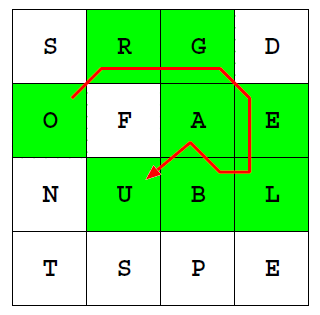

Aus dem Buchstabenquadrat in obiger Abbildung sollen nach folgenden Regeln Wörter gebildet werden:

1. Man darf bei jedem Buchstaben beginnen und dann so lange einen der maximal acht Nachbarbuchstaben hinzufügen, bis man ein Wort gefunden hat oder alle Buchstaben aufgebraucht sind.
2. Alle sinnvollen Teilwörter, die sich unterwegs ergeben, sind ebenfalls gültig.
3. Alle Buchstaben die auf bereits verwendeten Plätzen liegen dürfen nicht mehr hinzugenommen werden (kreuzungsfreier Weg).

Die Redaktion einer Rätselzeitschrift hat **65 Lösungen durch Probieren** entdeckt. 
Dieses Ergebnis wollen wir mithilfe einer **Brute-Force-Attacke** und einer Liste von 160086 deutschen Wörten überbieten.

Dazu schreiben wir zunächst eine Funktion, die für ein gegebenes Wort prüft, ob man es auf die beschriebene Weise in der Abbildung findet, und probieren dann alle Wörter durch. Die Musterlösung benötigt dazu **weniger als 5 Sekunden** [^1].

Die Idee für den Algorithmus ist folgende:

- Nehme den ersten Buchstaben des Wortes
- **Iteriere über alle Positionen der Buchstabenmatrix** und suche den Buchstaben. 
  - Wenn Du ihn findest, merke Dir die Position in der Matrix und markiere sie als besucht.
  - Wenn Du ihn nicht findest, gebe `False` zurück.

- Wiederhole, solange es Buchstaben im Wort gibt:
  - Nehme den nächsten Buchstaben
  - **Iteriere über alle noch nicht besuchten Nachbarfelder** und suche den Buchstaben
    - Wenn Du ihn findest, merke Dir die Position und markiere sie als besucht[^2].
    - Wenn Du ihn nicht findest, gebe `False` zurück.
- Gebe `True` zurück

Die beiden verwendeten Iterationen lassen sich in Python elegant über **Generatorfunktionen** realisieren.

[^1] In der ursprünglichen Aufgabe wurde ein C-Programm benutzt, um alle möglichen Buchstabenfolgen in der Matrix zu erzeugen und in eine 160 MB große Datei zu schreiben. Dieser IO-intensive Ansatz benötigt deutlich länger.

[^2] Der hier beschriebene Greedy-Algorithmus findet evtl. nicht alle Wörter, da es beim **`L`** 
zwei benachbarte `E` gibt und man eigentlich beide probieren müsste. Wer nachweist, dass man dadurch mindestens ein mögliches Wort nicht findet (indem er mehr Worte findet als die Musterlösung), **erhält Bonuspunkte**.

## Implementierung

Beginnen wir zunächst mit der Definition der Matrix:

In [1]:
MATRIX = [ list("SRGD"), list("OFAE"), list("NUBL"), list("TSPE") ]

## Generaturfunktionen

Wir werden die Koordinaten einer Position in der Matrix als Tupel `(i, j)` darstellen.
Schreiben Sie zwei Generatorfunktionen `start()` und `neighbors(p)`, die alle gültigen Startpositionen bzw. alle gültigen Nachbarpunkte des Punktes `p` berechnen.

In [6]:
def start():
    """ Generaturfunktion für alle Startpunkte """
    
    # TODO
    
            
def neighbors(p):
    """ Generatorfunktion für alle Nachbarn von p """
    
    # TODO

## Suchfunktion

Implementieren Sie nun eine Suchfunktion, die prüft, ob ein gegebene Wort in der Matrix vorkommt.

In [7]:
def search(word):
    """ Suche Wort im Buchstabenrätsel """
    
    # TODO

In [8]:
# ORGELBAU sollte gefunden werden
search("ORGELBAU")

In [9]:
# SONATE sollte nicht gefunden werden
search("SONATE")

## Suche

Iterieren Sie nun über die Datei `german.lst` und suchen Sie alle Treffer.

**Achtung**: Wenn Sie die Datei zeilenweise lesen, müssen Sie den Zeilenbruch am Ende weglassen. Außerdem müssen Sie die Worte in Großbuchstaben umwandeln!